In [96]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [97]:
# Load the dataset
dataSet = pd.read_csv('data/iris.csv')

# Display the first few rows of the data
print("First few rows of the dataset:")
print(dataSet.head(10))     # loading in the first 10 data entries

First few rows of the dataset:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
5           5.4          3.9           1.7          0.4  Setosa
6           4.6          3.4           1.4          0.3  Setosa
7           5.0          3.4           1.5          0.2  Setosa
8           4.4          2.9           1.4          0.2  Setosa
9           4.9          3.1           1.5          0.1  Setosa


In [98]:
# Features (X) and target variable (y)
X = dataSet.drop('variety', axis=1)     # X axis is everything but variety
y = dataSet['variety']                  # y axis is variety only

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True) # 20% test 80 train split, 42 for seeding the randomness so each run has the same random number list, shuffeling the data so we know the order doesn't influence our model

print("Shape of training data:", X_train.shape) #120 rows with 4 columns
print("Shape of testing data:", X_test.shape)   #30 rows with 4 columns

Shape of training data: (120, 4)
Shape of testing data: (30, 4)


In [99]:
# Initialize the logistic regression model
model = LogisticRegression()  # sklearn using sigmoid's function to map real values to values 0-1

# Train the model
model.fit(X_train, y_train) #our new created model gets adjusted to our values automatically calc stuff like bias & wights

print("Model training completed!")

Model training completed!


In [100]:
# Make predictions on the test set
y_pred = model.predict(X_test)      # Test our dataset with making predictions

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)       # calculate the accuracy    correct predictions / all predictions
print("Accuracy:", accuracy)    # Proportion of correct predictions 

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))   # recall: ratio if correctly predicted positives to actually positives, f1: averafe between precision and recall, Support is the actual number of occurrences 

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")    # 1: Setosa, 2: Versicolor, 3: Virginica
print(cm)

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


C:\Users\gabri\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

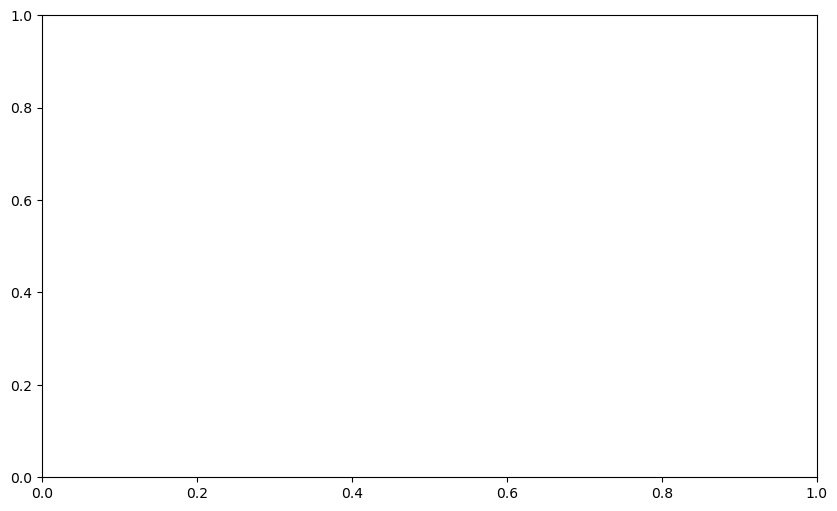

In [104]:
# Create a meshgrid to plot the decision boundary
x_min, x_max = X['sepal.length'].min(), X['sepal.length'].max()
y_min, y_max = X['sepal.width'].min(), X['sepal.width'].max()

xx, yy = np.meshgrid(np.linspace(x_min - 0.5, x_max + 0.5, 100),
                     np.linspace(y_min - 0.5, y_max + 0.5, 100))

# Predict class for each point on the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
contour = plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X['sepal.length'], X['sepal.width'], c=y, edgecolor='k', s=20)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title(f'Logistic Regression Decision Boundary (Accuracy: {accuracy:.2f})')
plt.colorbar(contour, label='Predicted Species')
plt.show()